In [8]:
# install required module
# uncomment line below to install 
#! pip install geopandas

#### Standard imports

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
plt.style.use("ggplot")

In [28]:
# load clean data
train_df = pd.read_csv('../data/train_cleaned.csv')
store_df = pd.read_csv('../data/store_711_en.csv')
bkk_zone_df = pd.read_csv('../data/bkk_zone.csv')
#train_df.drop('Unnamed: 0', axis=1, inplace=True)

In [30]:
palette = ["#ffb4bfff","#fbfbaaff","#ffc7f0ff","#d2ffbeff","#ffd380ff","#b9cdffff"]

In [32]:
bkk_zone_df.head()

,zone_name,district_en
0,Zone 1,Bang Phlat
1,Zone 1,Dusit
2,Zone 1,Bangkok Noi
3,Zone 1,Pom Prap Sattru Phai
4,Zone 1,Phra Nakhon


In [34]:
# merge store with BKK zone
store_zone = pd.merge(left=store_df, right=bkk_zone_df)
store_zone

,store_code,district_en,sub_district_en,province_en,latitude,longitude,zone_name
0,16181,Bang Khun Thian,Tha Kham,Bangkok,13.549793,100.420630,Zone 6
1,18121,Bang Khun Thian,Tha Kham,Bangkok,13.572393,100.421720,Zone 6
2,14611,Bang Khun Thian,Tha Kham,Bangkok,13.571103,100.440200,Zone 6
3,16807,Bang Khun Thian,Tha Kham,Bangkok,13.582354,100.427109,Zone 6
4,10363,Bang Khun Thian,Samae Dam,Bangkok,13.590910,100.387831,Zone 6
...,...,...,...,...,...,...,...
3727,9595,Don Mueang,Si Kan,Bangkok,13.951895,100.573278,Zone 3
3728,15853,Don Mueang,Si Kan,Bangkok,13.953850,100.573670,Zone 3
3729,12090,Don Mueang,Sanam Bin,Bangkok,13.949378,100.612767,Zone 3
3730,3925,Sai Mai,Sai Mai,Bangkok,13.949113,100.622801,Zone 3


In [36]:
# count store group by zone name
graph_store_zone = store_zone.groupby('zone_name')['province_en'].value_counts().reset_index()

C:\Users\uttha\AppData\Local\Temp\ipykernel_42004\1864653961.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='zone_name', y='count', data=graph_store_zone, palette=palette)


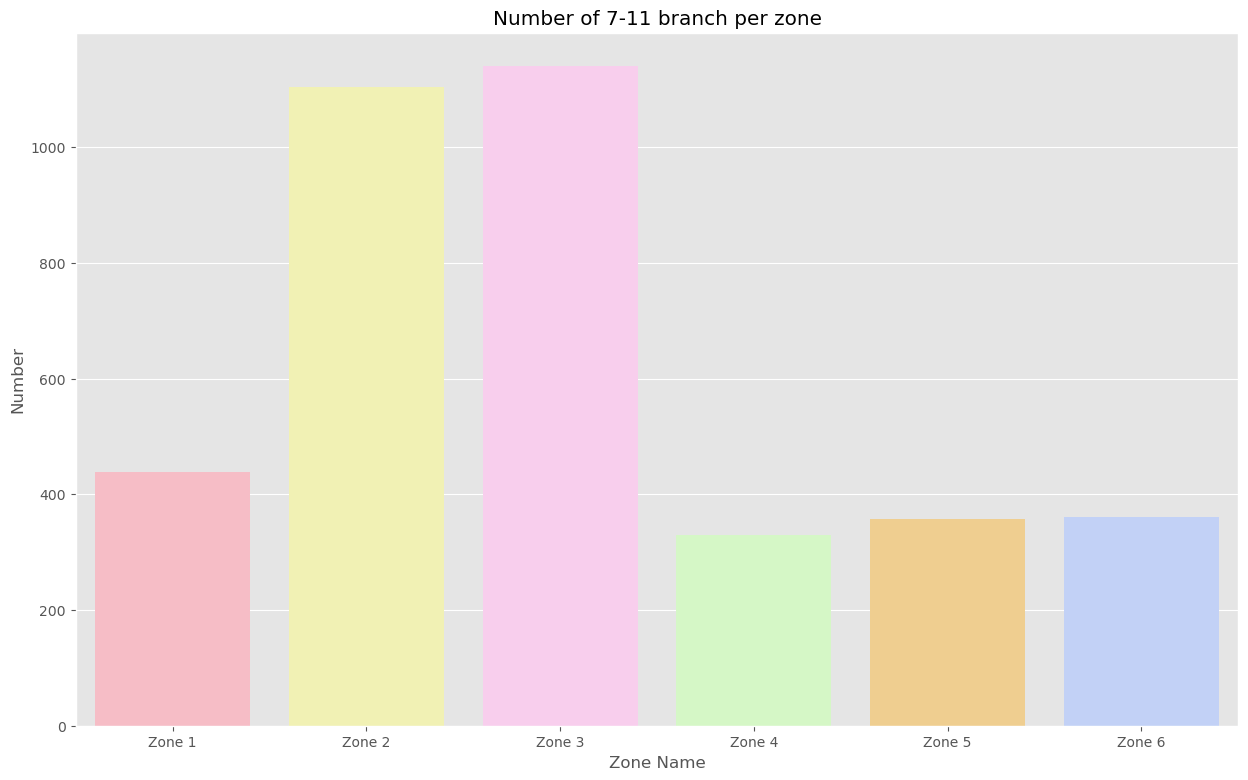

In [38]:
# plot number of store per zone
plt.figure(figsize=(15,9))
sns.barplot(x='zone_name', y='count', data=graph_store_zone, palette=palette)
plt.xlabel('Zone Name')
plt.ylabel('Number')
plt.title('Number of 7-11 branch per zone');
plt.savefig('../figures/zone_store_711.png')

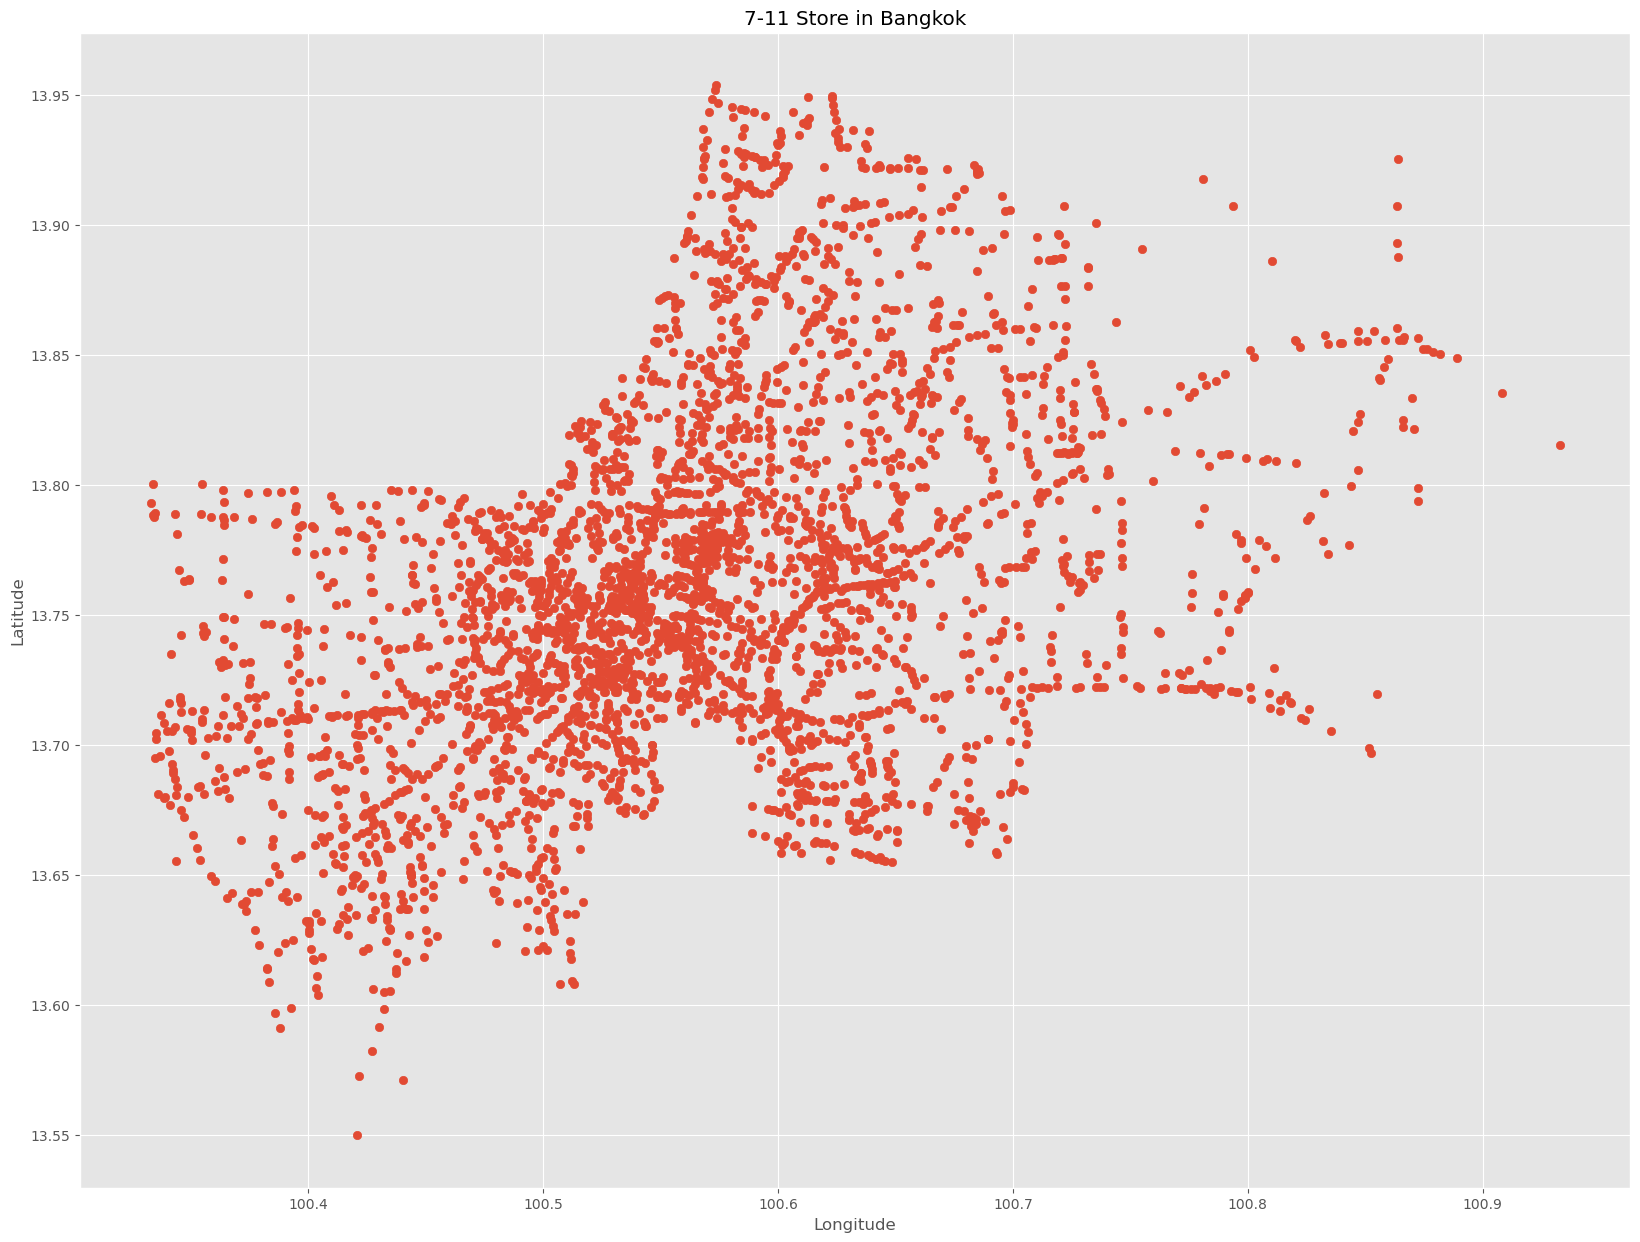

In [40]:
plt.figure(figsize=(20,15))
plt.scatter(x=store_df['longitude'], y=store_df['latitude'])
plt.title('7-11 Store in Bangkok')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('../figures/map_store_711.png')
plt.show();

In [10]:
store_df.dtypes

store_code           int64
district_en         object
sub_district_en     object
province_en         object
latitude           float64
longitude          float64
dtype: object

#### Review values range and outliers

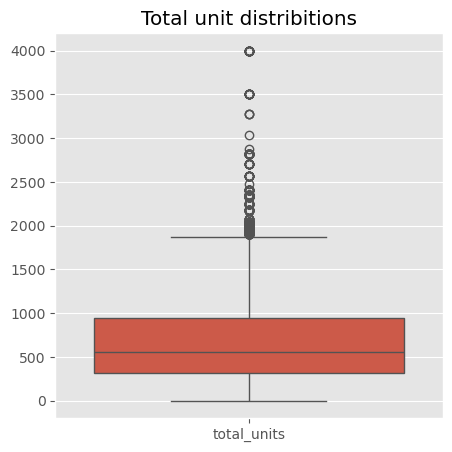

In [144]:
# plot features value distribitions
plt.figure(figsize=(5,5))
sns.boxplot(data=train_df[['total_units']])
plt.title('Total unit distribitions');

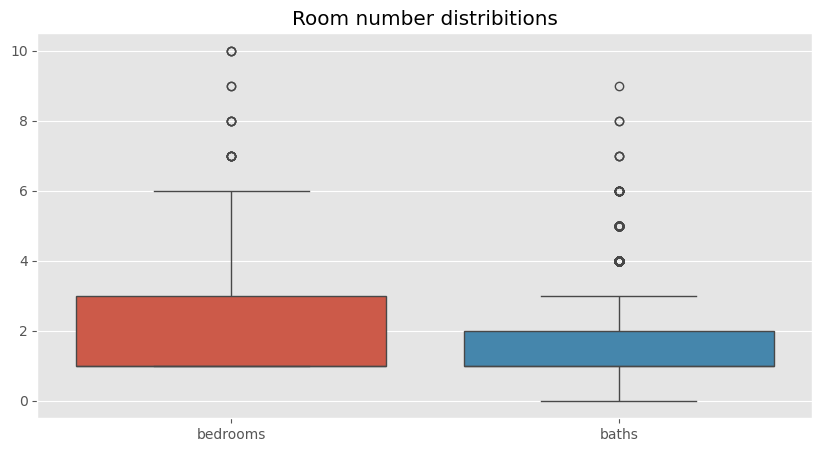

In [74]:
# plot room number distribitions
plt.figure(figsize=(10,5))
sns.boxplot(data=train_df[['bedrooms','baths']])
plt.title('Room number distribitions');

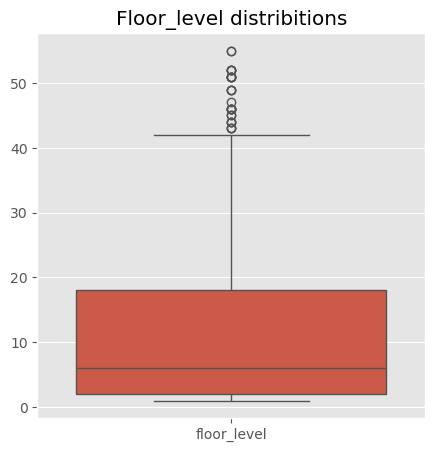

In [62]:
# plot area value distribitions
plt.figure(figsize=(5,5))
sns.boxplot(data=train_df[['floor_level']])
plt.title('Floor_level distribitions');

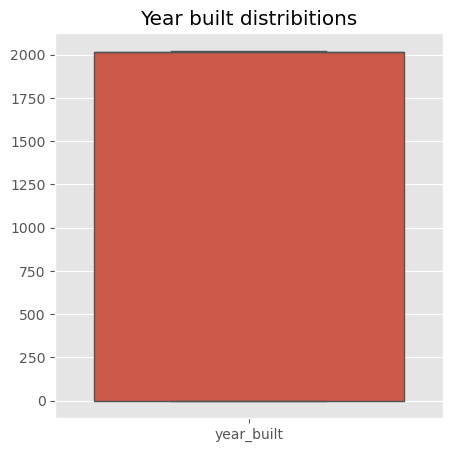

In [66]:
# plot floor level distribitions
plt.figure(figsize=(5,5))
sns.boxplot(data=train_df[['year_built']])
plt.title('Year built distribitions');

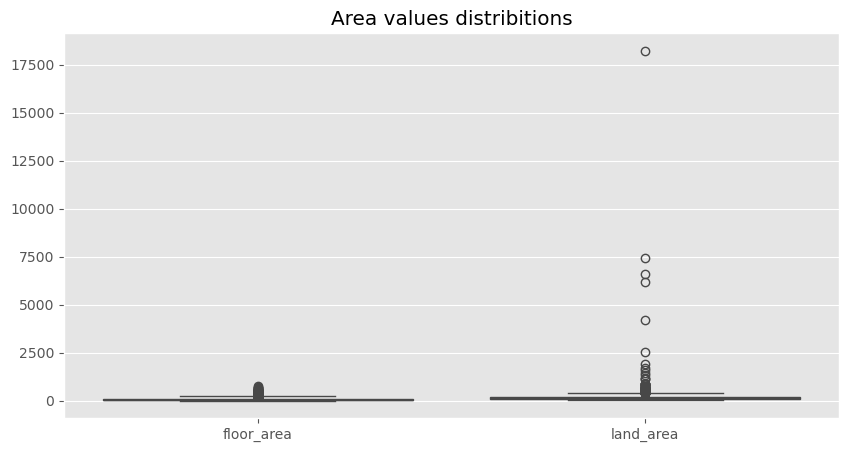

In [68]:
# plot area value distribitions
plt.figure(figsize=(10,5))
sns.boxplot(data=train_df[['floor_area','land_area']])
plt.title('Area values distribitions');

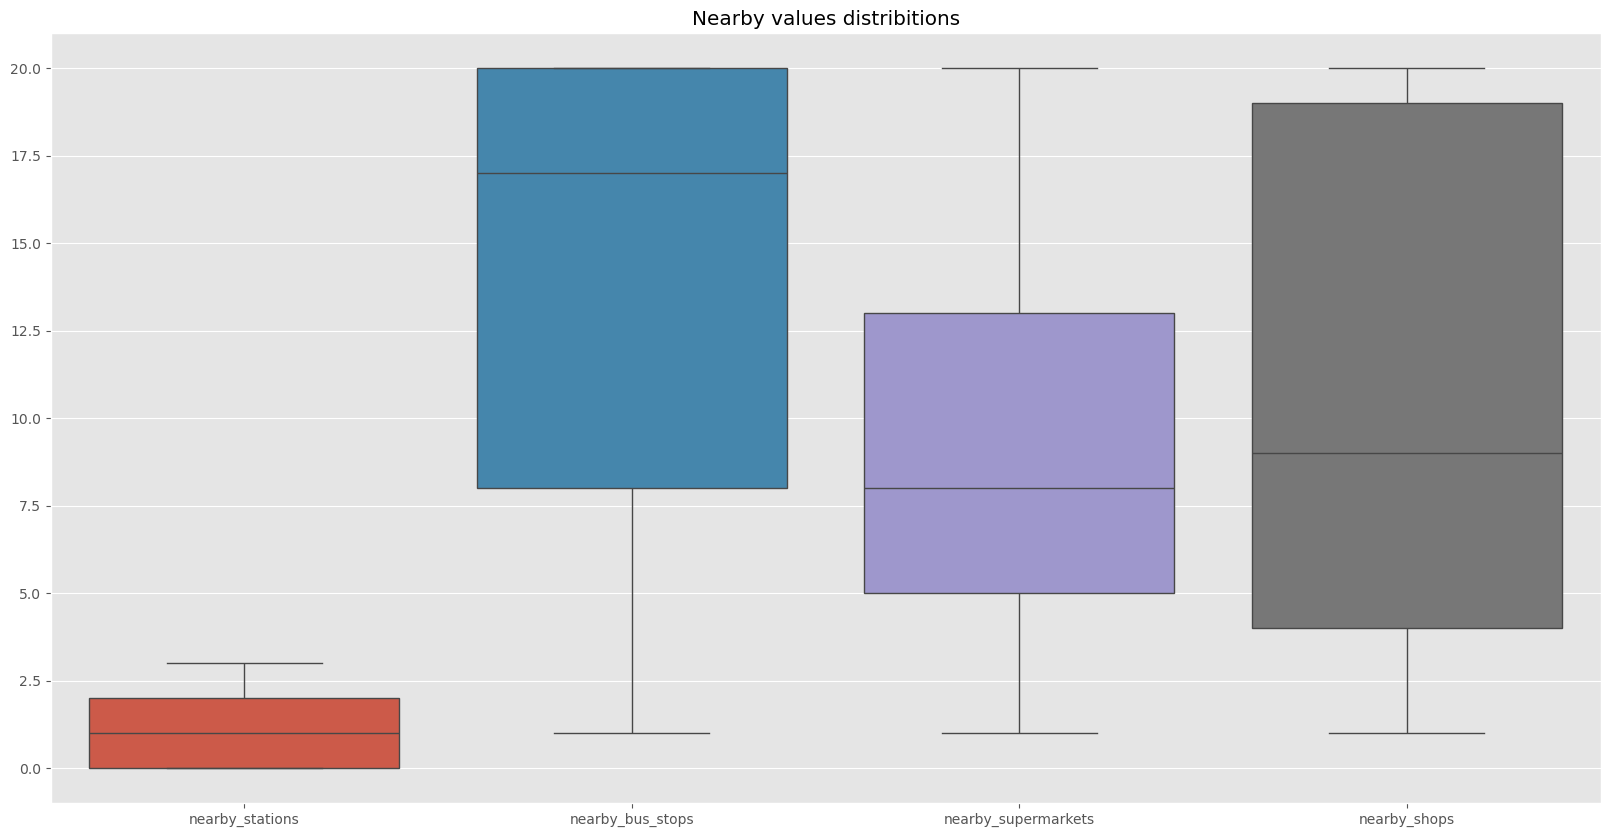

In [151]:
# plot nearby values distribitions
plt.figure(figsize=(20,10))
sns.boxplot(data=train_df[['nearby_stations',
                           'nearby_bus_stops','nearby_supermarkets','nearby_shops']])
plt.title('Nearby values distribitions');

#### Visualize condo data in bangkok

In [179]:

# Filtering only Condo in Bangkok
condo_df = train_df[(train_df['property_type'] == 'Condo') & (train_df['province'] == 'Bangkok')]
# Rename column from district to district_en 
condo_df = condo_df.rename(columns={"district": "district_en"})
# Merge condo data with bkk zone
condo_df = pd.merge(left=condo_df,right=bkk_zone_df)

In [181]:
# Remove Duplicate by assuming that the same condo have the same 'latitude' and 'longitude'
condo_drop_duplicate_address = condo_df.drop_duplicates(subset=['latitude', 'longitude'], keep='first')
condo_drop_duplicate_address_zone = condo_drop_duplicate_address.groupby('zone_name')['id'].count().reset_index()
condo_drop_duplicate_address_zone

,zone_name,id
0,Zone 1,97
1,Zone 2,692
2,Zone 3,253
3,Zone 4,14
4,Zone 5,33
5,Zone 6,30


In [183]:
# Filtering only Condo in Bangkok
condo_df = train_df[(train_df['property_type'] == 'Condo') & (train_df['province'] == 'Bangkok')]
# Rename column from district to district_en 
condo_df = condo_df.rename(columns={"district": "district_en"})
# Merge condo data with bkk zone
condo_df = pd.merge(left=condo_df,right=bkk_zone_df)

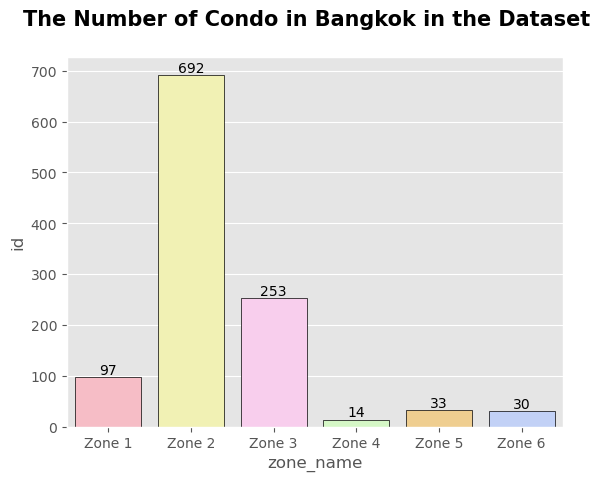

In [185]:
# Visualize The number of Condo in Bangkok in the Dataset
ax = sns.barplot(x = 'zone_name', y = 'id', data = condo_drop_duplicate_address_zone,palette=palette, hue = 'zone_name',edgecolor='black');
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.bar_label(ax.containers[2], fontsize=10)
ax.bar_label(ax.containers[3], fontsize=10)
ax.bar_label(ax.containers[4], fontsize=10)
ax.bar_label(ax.containers[5], fontsize=10)
plt.suptitle('The Number of Condo in Bangkok in the Dataset', fontsize=15, fontweight="bold")
plt.savefig('../figures/condo_in_bkk.png')

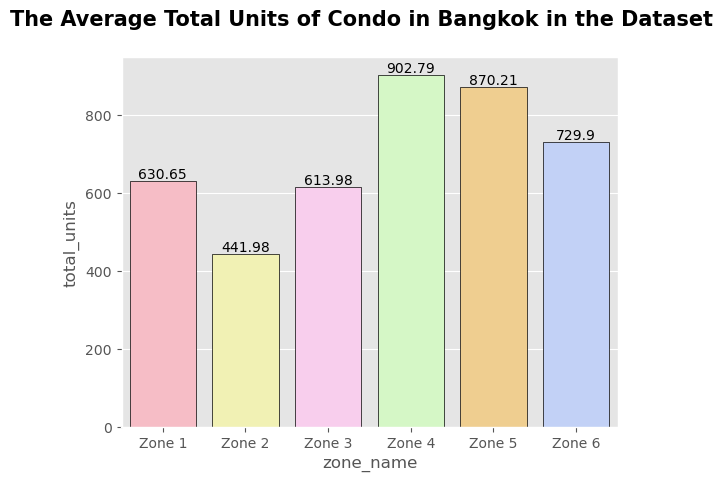

In [187]:
# Visualize The Average Total Units of Condo in Bangkok in the Dataset
ax = sns.barplot(x = 'zone_name', y = 'total_units', data = condo_drop_duplicate_address.groupby('zone_name')['total_units'].mean().round(2).reset_index(),palette=palette, hue = 'zone_name',edgecolor='black');
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.bar_label(ax.containers[2], fontsize=10)
ax.bar_label(ax.containers[3], fontsize=10)
ax.bar_label(ax.containers[4], fontsize=10)
ax.bar_label(ax.containers[5], fontsize=10)
plt.suptitle('The Average Total Units of Condo in Bangkok in the Dataset', fontsize=15, fontweight="bold")
plt.savefig('../figures/condo_unit_bkk.png')

In [ ]:
sns.plot

#### Write housing with store data

In [154]:
train_df.to_csv('../data/train_store_clearned.csv')